# Imports

In [12]:
from collections import defaultdict
import itertools
import matplotlib
import networkx as nx

# The Classes

In [3]:
from collections import defaultdict
import itertools

In [4]:
from collections import defaultdict
class Graph(object):
    '''
    Graph Data Structure, undirected by default
    '''
    
    def __init__(self):
        self.adjacency = defaultdict(set)
       # self.dis = {}
      #  self.tim = {}
       # self.net = {}
        self.coordinates = {}
        self.adj_list_d = defaultdict(list)
        self.adj_list_t = defaultdict(list)
        self.adj_list_n = defaultdict(list)
        
    def add(self, node1, node2):
        ''' Add connection between node1, node2'''
        self.adjacency[int(node1)].add(int(node2))
        self.adjacency[int(node2)].add(int(node1))
        #self.net[int(node1), int(node2)] = 1
    
    def distance(self, node1, node2, d):
        ''' Create the distance measure between node1 and node2 '''
        #self.dis[(int(node1), int(node2))] = int(d)
        if [int(d), int(node2)] not in self.adj_list_d[int(node1)]:
            self.adj_list_d[int(node1)].append([int(d), int(node2)])
            self.adj_list_d[int(node2)].append([int(d), int(node1)])
            self.adj_list_n[int(node1)].append([1, int(node2)])
            self.adj_list_n[int(node2)].append([1, int(node1)])
        
    def time(self, node1, node2, t):
        ''' Create the time distance measure between node 1 and node 2'''
        
        #self.tim[(int(node1), int(node2))] = int(t)
        if [ int(t), int(node2)] not in  self.adj_list_t[int(node1)]:
            self.adj_list_t[int(node1)].append([ int(t), int(node2)])
            self.adj_list_t[int(node2)].append([int(t), int(node1)])
        
    def coordinate(self, node, coordinate1, coordinate2):
        '''Save the coordinates of every node'''
        self.coordinates[int(node)] = [int(coordinate1), int(coordinate2)]
    
    def nodes_(self):
        ''' All the nodes of the graph '''
        return list(set(self.adjacency.keys()))
    
    def edges(self):
        ''' Return all the edges of the graph '''
        return list(self.dis.keys())
    
    def print_adj_list_d(self):
        for keys, values in self.adj_list_d.items():
            print(keys, values)
            
    def print_adj_list_t(self):
        for keys, values in self.adj_list_d.items():
            print( keys, values)
    '''DFS for the first functionality'''      
    def dfs(self, startnode, visited, dist, kind):
        if visited is None:
            visited = set() 
        visited.add(startnode)
        for i in kind[startnode]:
            if i[1] not in visited:
                if i[0] < dist:
                    self.dfs(i[1], visited, dist-i[0], kind)
        return visited
        
    def functionality1(self):
        startnode = int(input("Give me the node as a number: \n "))
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        dist = int(input("Put a number as threshold distance: \n "))
        if measure == 1:
            a=[self.dfs(startnode, None, dist, self.adj_list_d),startnode,measure]
            return a
        elif measure == 2:
            a=[self.dfs(startnode, None, dist, self.adj_list_t),startnode,measure]
            return a
        elif measure == 3 :
            a=[self.dfs(startnode, None, dist, self.adj_list_n),startnode,measure]
            return a
        
    '''This Dijsktra return a list of nodes that you will touch in the minimum path.
    The code works exactly like the dijsktra method renewing each time the weight and predecessor of a node. 
    We point the attention that the weights arer always counted for all the path, so every node
    in shortest_paths will have a weight assocviated to a path, not only a couple of nodes'''
    def dijsktra(self, initial, end, kind):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
        shortest_paths = {initial: (None, 0)}
        current_node = initial
        visited = set()
    
        while current_node != end:
            visited.add(current_node)
            destinations = kind[current_node]
            weight_to_current_node = shortest_paths[current_node][1]

            for next_node in destinations:
                weight = next_node[0] + weight_to_current_node
                if next_node[1] not in shortest_paths:
                    shortest_paths[next_node[1]] = (current_node, weight)
                else:
                    current_shortest_weight = shortest_paths[next_node[1]][1]
                    if current_shortest_weight > weight:
                        shortest_paths[next_node[1]] = (current_node, weight)
            next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
            if not next_destinations:
               # return "Route Not Possible"
                return [],[]
        # next node is the destination with the lowest weight in the second component
            current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
           
    
    # Work back through destinations in shortest path
        path = []
        #print(shortest_paths)
        while current_node is not None:
            path.append(current_node)
            next_node = shortest_paths[current_node][0]
            current_node = next_node
        
        path = path[::-1]
        tup = []
        for i in range(len(path)-1):
            tup.append((path[i], path[i+1]))
        return tup, shortest_paths[end][1]
    
    def dijsktrafor2(self, nodes, kind):
        #a list of tuples, each one a permutation of the nodes the user gave.
        permuTuples = list(itertools.permutations(nodes))
        final_path = []
        weight_final =99999999999 
        for i in permuTuples:
            obj = list(i)
            path = []
            weight = 0
            lenpath = 0
            for j in range(len(obj)-1):
                A, B = self.dijsktra(obj[j], obj[j+1], kind)
                if A == [] and B == []:
                    break
                path.append(A)
                weight = weight + B
            if weight < weight_final:
                weight_final = weight
                final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print

    def functionality2(self):
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.').split()]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            a=[self.dijsktrafor2(startnodes,self.adj_list_d),startnodes,measure]
            return a
        elif measure == 2:
            a=[self.dijsktrafor2(startnodes,self.adj_list_t),startnodes,measure]
            return a
        elif measure == 3 :
            a=[self.dijsktrafor2(startnodes,self.adj_list_t),startnodes,measure]
            return a
    
    
    def dijsktrafor3(self, startnode, nodes, kind):
        nodi = [startnode]
        for i in nodes:
            nodi.append(i)
        final_path = []
        final_weight = 0
        to_print = []
        for i in range(len(nodi)-1):
            A, B = self.dijsktra(nodi[i], nodi[i+1], kind)
            if A == []:
                    return 'No path ordered allowed'
            final_weight += B
            final_path.append(A)
        for i in final_path:
            for j in i:
                to_print.append(j)
        return to_print
    
    def functionality3(self):
        H_n = int(input('Write the number associated to the starting node.\n'))
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.\n').split()]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            a=[self.dijsktrafor3( H_n, startnodes, self.adj_list_d),H_n, startnodes,measure]
            return a
        elif measure == 2:
            a=[self.dijsktrafor3( H_n, startnodes, self.adj_list_t),H_n, startnodes,measure]
            return a
        elif measure == 3 :
            a=[self.dijsktrafor3( H_n, startnodes, self.adj_list_n),H_n, startnodes,measure]
            return a        
        
    def dijsktrafor4(self, startnode, nodes, endnode, kind):
        permuTuples = list(itertools.permutations(nodes))
        #count = 0
       # if len(nodes)>7:
         #   euristic = 
        final_path = []
        weight_final =999999999999 
        for i in permuTuples:
            obj = [startnode]
            for k in i:
                obj.append(k)
            obj.append(endnode)
            path = []
            weight = 0
            lenpath = 0
            for j in range(len(obj)-1):
                A, B = self.dijsktra(obj[j], obj[j+1], kind)
                if A == []:
                    break
                path.append(A)
                weight = weight + B
            if weight < weight_final:
                weight_final = weight
                final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print
        
        
        
    def functionality4(self):
        H_n = int(input('Write the number associated to the starting node.\n'))
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other, remember the last one will be always our end point.\n').split()]
        endnode = startnodes[-1]
        startnodes = startnodes[:-1]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            a=[self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_d),H_n,endnode,startnodes, measure ]
            return a
        elif measure == 2:
            a=[self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_t),H_n,endnode,startnodes, measure ]
            return a
        elif measure == 3 :
            a=[self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_n),H_n,endnode,startnodes, measure ]
            return a

# Read the Data
#### Previewing the data, we notice that the first 7 rows are an introduction and an a prologue for the data that follows, so we skip these

#### Let's create a Graph out of our Data

In [5]:
G = Graph()
with open(r"USA-road-d.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.distance(ww[1], ww[2], ww[3])
        n += 1
with open(r"USA-road-d.CAL.co", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.coordinate(ww[1], ww[2], ww[3])
        n += 1
with open(r"USA-road-t.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.time(ww[1], ww[2], ww[3])
        n += 1

In [6]:
#visualization

#for the visualization we will use the networkx so we rebuild the data structure with networkx
Gr=nx.DiGraph()
f=open("USA-road-d.CAL.gr","r",encoding='utf-8')
t=f.readlines()
f.close()
for i in range(7,len(t)):
    a=t[i].split()
    Gr.add_edge(int(a[1]),int(a[2]), distance=int(a[3]))
f=open("USA-road-t.CAL.gr","r",encoding='utf-8')
t=f.readlines()
f.close()
for i in range(7,len(t)):
    a=t[i].split()
    Gr.add_edge(int(a[1]),int(a[2]), time=int(a[3]))
f=open("USA-road-d.CAL.co","r",encoding='utf-8')
t=f.readlines()
f.close()
for i in range(7,len(t)):
    a=t[i].split()
    Gr.add_node(i-6, cordinate1=a[2])
    Gr.add_node(i-6, cordinate2=a[3])


In [7]:
Gr.nodes[100]

{'cordinate1': '-114390182', 'cordinate2': '33959042'}

In [8]:
a=G.functionality2()

Write the nodes, each one spaced from the other.\


ValueError: invalid literal for int() with base 10: '\\'

In [278]:
newgraph=[]
for i in range(0, len(a[0])-1):
    newgraph.append(a[0][i][0])
newgraph.append(a[0][-1][0])
newgraph.append(a[0][-1][1])


In [279]:
k=Gr.subgraph(newgraph)

In [284]:
color_map = []
nodesize=[]
for i in range(0,len(newgraph)):
    count=0
    for j in range(0, len(a[1])):
        if newgraph[i]==a[1][j]:
            count=+1
    if count==0:
        nodesize.append(20)
        color_map.append("blue")
    else:
        color_map.append("red")
        nodesize.append(50)

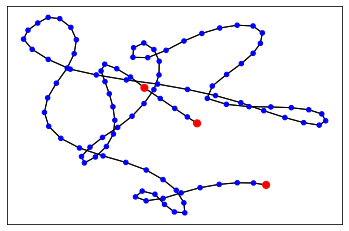

In [286]:
if a[2]==1:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="blue",arrows=False)
if a[2]==2:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph,edge_color="black",arrows=False)
if a[2]==3:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="red",arrows=False)

In [12]:
a=G.functionality1()

Give me the node as a number: 
 10
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1
Put a number as threshold distance: 
 30000


In [37]:
newgraph=a[0]
newgraph=list(newgraph)
k=Gr.subgraph(newgraph)
color_map = []
nodesize=[]
for i in range(0,len(newgraph)):
    count=0
    if newgraph[i]==a[1]:
        count=+1
    if count==0:
        nodesize.append(20)
        color_map.append("blue")
    else:
        color_map.append("red")
        nodesize.append(50)


['blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue']

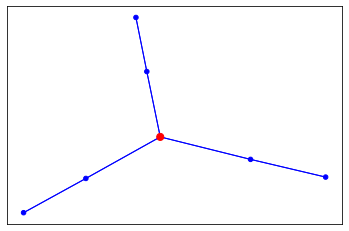

In [38]:
if a[2]==1:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="blue",arrows=False)
if a[2]==2:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph,edge_color="black",arrows=False)
if a[2]==3:
    nx.draw_networkx(k,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="red",arrows=False)

In [7]:
a=G.functionality3()

Write the number associated to the starting node.
10
Write the nodes, each one spaced from the other.
12 34 5
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1


In [9]:
G3=nx.DiGraph()
for i in range(0,len(a[0])):
    G3.add_edge(a[0][i][0],a[0][i][1])


In [10]:
newgraph= []
color_map=[]
nodesize=[]
newgraph = [item for sublist in a[0] for item in sublist]
color_map = ["purple"]
nodesize=[100]

for i in range(1,len(newgraph)):
    count=0
    for j in range(0,len(a[2])):
        if newgraph[i]==a[2][j]:
            count+=1
            color_map.append("red")
            nodesize.append(50)
    if count==0:
        color_map.append("blue")
        nodesize.append(20)


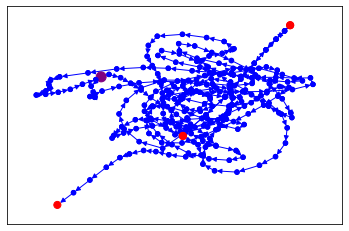

In [13]:
if a[3]==1:
    nx.draw_networkx(G3,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="blue",arrows=True)
if a[3]==2:
    nx.draw_networkx(G3,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph,edge_color="black",arrows=True)
if a[3]==3:
    nx.draw_networkx(G3,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="red",arrows=True)

In [15]:
a=G.functionality4()

Write the number associated to the starting node.
10
Write the nodes, each one spaced from the other, remember the last one will be always our end point.
23 2344 4
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1


In [20]:
print(a[1],a[2],a[3],a[4])

10 4 [23, 2344] 1


In [28]:
G4=nx.DiGraph()
for i in range(0,len(a[0])):
    G4.add_edge(a[0][i][0],a[0][i][1])
newgraph= []
color_map=[]
nodesize=[]
newgraph = [item for sublist in a[0] for item in sublist]
color_map = ["purple"]
nodesize=[100]

for i in range(1,len(newgraph)-1):
    count=0
    for j in range(0,len(a[3])-1):
        if newgraph[i]==a[3][j]:
            count+=1
            color_map.append("red")
            nodesize.append(50)
    if count==0:
        color_map.append("blue")
        nodesize.append(20)
color_map.append("purple")
nodesize.append(100)

252


252

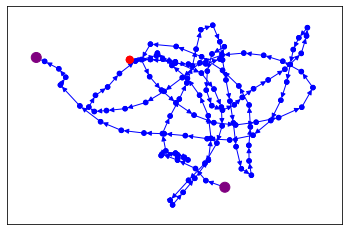

In [29]:
if a[4]==1:
    nx.draw_networkx(G4,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="blue",arrows=True)
if a[4]==2:
    nx.draw_networkx(G4,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph,edge_color="black",arrows=True)
if a[4]==3:
    nx.draw_networkx(G4,node_size=nodesize, with_labels=False, node_color=color_map, nodelist=newgraph, edge_color="red",arrows=True)